# 1. 영어 문서에서 자주 등장한 단어 시각화
## &nbsp; &nbsp; <이상한 나라의 앨리스>에서 단어 빈도를 막대 그래프와 워드 클라우드로 시각화
<br/>

In [1]:
from nltk.corpus import gutenberg

files = gutenberg.fileids()
print(files)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [2]:
# 앨리스 문서 불러오기
alice = gutenberg.open('carroll-alice.txt').read()
sample = alice[:500]

print(sample)

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


In [6]:
# RegexpTokenizer로 토큰화

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("[\w']{3,}")    # 3글자 이상의 단어
tokens = tokenizer.tokenize(alice.lower())   # 대소문자 구분X

print(tokens[:30])

["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister', 'the', 'bank', 'and', 'having', 'nothing', 'once', 'twice', 'she', 'had', 'peeped']


In [7]:
# 불용어 제거
from nltk.corpus import stopwords

stopwords_eng = stopwords.words('english')

result_tokens = [word for word in tokens if word not in stopwords_eng]

print(result_tokens[:30])

["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', "'and", 'use', 'book', 'thought', 'alice', "'without"]


In [13]:
# 단어 빈도 수 세기
import pandas as pd

alice_count = pd.Series(result_tokens).value_counts().head(20)  # 상위 20개
print(alice_count)

said       462
alice      385
little     128
one         98
know        88
like        85
went        83
would       78
could       77
thought     74
time        71
queen       68
see         67
king        61
began       58
turtle      57
'and        56
way         56
mock        56
gryphon     55
dtype: int64


In [36]:
# 품사 태깅
# 명사, 동사, 형용사만 추출
tag_list = ['NN', 'VB', 'VBD', 'JJ']

import nltk
new_alice = [word for word, tag in nltk.pos_tag(result_tokens) if tag in tag_list]   # 명사, 동사, 형용사만 추출

alice_count = pd.Series(new_alice).value_counts().head(20)
print(alice_count)

hatter      40
looked      42
see         42
rabbit      42
got         44
gryphon     45
head        46
voice       48
thing       49
thought     54
mock        55
turtle      56
way         56
began       58
queen       66
time        71
went        83
little     124
alice      293
said       462
dtype: int64


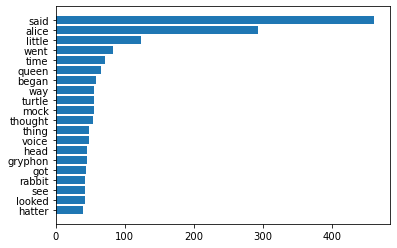

In [42]:
# 막대 그래프로 시각화
import matplotlib.pyplot as plt

reverse_sort = alice_count
freq = [item for item in alice_count]
plt.barh(range(len(reverse_sort)), freq, tick_label=reverse_sort.index)   # plt.barh(y크기, x축, tick_label)
plt.show()

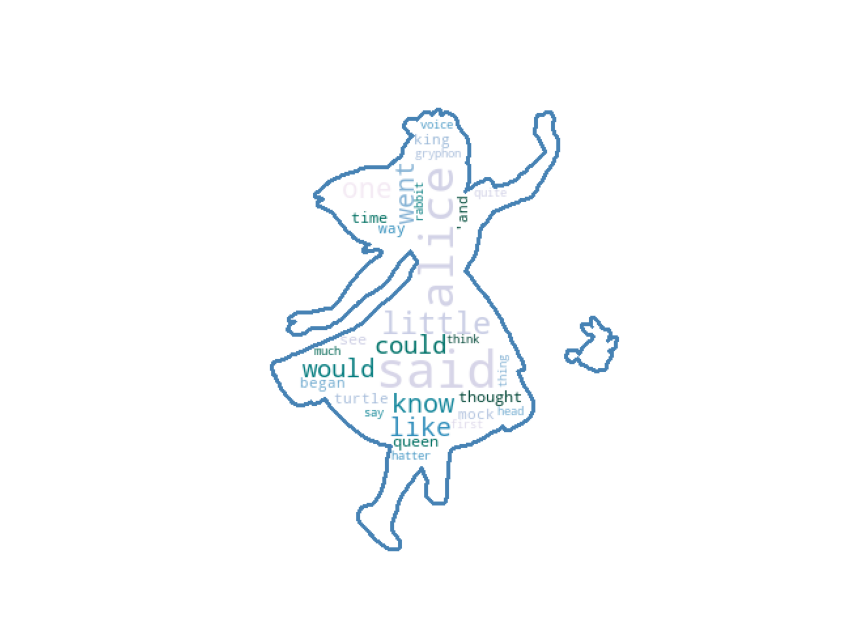

In [115]:
# 워드클라우드
from wordcloud import WordCloud

import numpy as np
from PIL import Image

import seaborn as sns
mask = np.array(Image.open("../alice_mask.png"))
alice_count = pd.Series(result_tokens).value_counts().head(30)  # 상위 30

wc = WordCloud(background_color = 'white',
              max_words=30,
              mask=mask,
              contour_width=3,
              contour_color='steelblue',
              colormap='PuBuGn')

wc.generate_from_frequencies(alice_count)

plt.figure(figsize=(15, 15))
plt.axis("off")
plt.imshow(wc)
plt.show()

# 2. 한글 문서에서 자주 등장한 단어 시각화
## &nbsp; &nbsp; 헌법 텍스트
<br/>

In [117]:
from konlpy.corpus import kolaw

law = kolaw.open("constitution.txt").read()
print(law[:500])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 


In [120]:
# 명사 토큰화
from konlpy.tag import Okt
t = Okt()

tokens = t.nouns(law)
print(tokens[:100])

# '애', '것'과 같은 불필요한 단어가 포함되어 있음

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국']


In [122]:
# 불용어 제거
new_tokens = [token for token in tokens if len(token) > 1]
print(new_tokens[:100])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '각하', '정의', '인도', '동포', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '국민', '생활', '향상', '기하', '항구', '세계', '평화', '인류', '공영', '이바지', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '다짐', '제정', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '대한민국', '국민', '요건', '법률', '국가', '법률', '재외국민']


In [124]:
# '모두', '우리'와 같은 단어 제외
stopwords = ['모두', '우리', '모든', '로써', '이제']
result_tokens = [token for token in new_tokens if token not in stopwords]
print(result_tokens[:100])

['대한민국', '헌법', '유구', '역사', '전통', '국민', '운동', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '각하', '정의', '인도', '동포', '민족', '단결', '공고', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '국민', '생활', '향상', '기하', '항구', '세계', '평화', '인류', '공영', '이바지', '자손', '안전', '자유', '행복', '확보', '다짐', '제정', '개정', '헌법', '국회', '의결', '국민투표', '개정', '대한민국', '민주공화국', '대한민국', '주권', '국민', '권력', '국민', '대한민국', '국민', '요건', '법률', '국가', '법률', '재외국민', '보호', '의무', '대한민국', '영토', '한반도', '부속', '도서', '대한민국']


법률      127
대통령      83
국가       73
국회       68
국민       61
헌법       53
기타       26
사항       23
의원       21
권리       21
임명       20
정부       20
선거       20
자유       20
직무       19
국무총리     19
임기       18
의무       18
경제       18
조직       18
dtype: int64


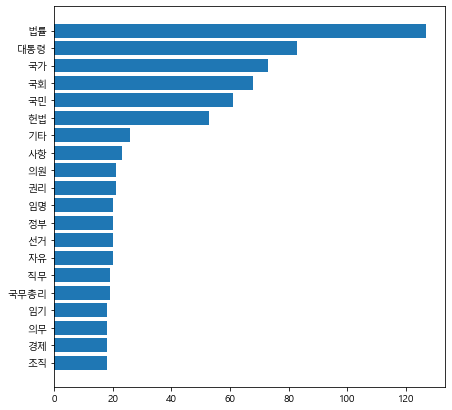

In [151]:
# 막대 그래프
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
word_count = pd.Series(result_tokens).value_counts().head(20)

print(word_count)

n = word_count[::-1]
w = [item for item in word_count[::-1]]


plt.figure(figsize=(7, 7))
plt.barh(range(len(n)), w, tick_label=n.index)
plt.show()

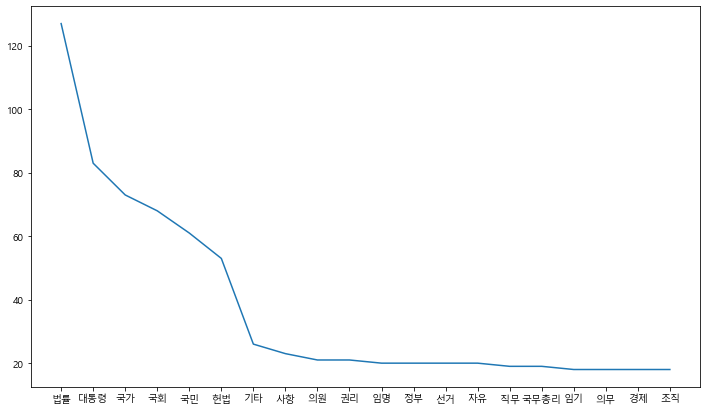

In [150]:
# 선 그래프
plt.figure(figsize=(12, 7))
plt.plot(n.index[::-1], w[::-1])
plt.show()

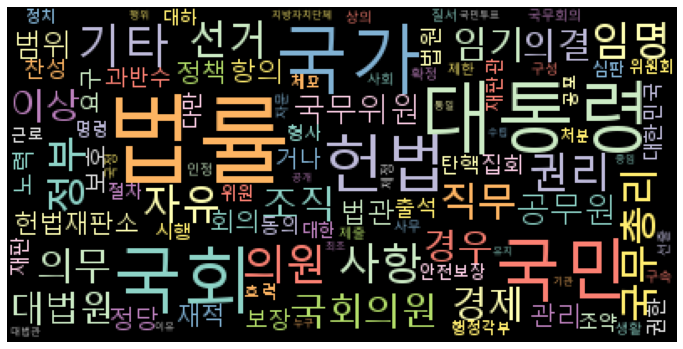

In [167]:
# 워드클라우드
font_path = "c:/Windows/Fonts/malgun.ttf"
wc = WordCloud(font_path=font_path,
                background_color='black',
                max_words=100,
                colormap='Set3')

wc.generate_from_frequencies(pd.Series(result_tokens).value_counts())

plt.figure(figsize=(12, 10))
plt.axis("off")
plt.imshow(wc)
plt.show()